In [56]:
documents = []

ego_id = '40379006'

file = open('/home/amaury/Lucas/n2/textos_tradados/egos/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

file = open('/home/amaury/Lucas/n2/textos_tradados/alters/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [58]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10
learning_decay = .9
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [59]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [60]:
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: yes right sure gt happy
Topic #1: help umbrella power girl better
Topic #2: god life like know good
Topic #3: best got retweet really god
Topic #4: day great live tonight look
Topic #5: come faith like says tell
Topic #6: pt ps ladies message little
Topic #7: god things heart stand listen
Topic #8: leaders goal people need start
Topic #9: love new jesus video church



In [61]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.03,0.03,0.03,0.03,0.03,0.03,0.7,0.03,0.03,0.03,6
1,0.01,0.01,0.01,0.27,0.01,0.01,0.01,0.01,0.61,0.01,8
2,0.87,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
3,0.01,0.01,0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2
4,0.02,0.02,0.02,0.02,0.85,0.02,0.02,0.02,0.02,0.02,4
5,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02,0.02,0.02,4
6,0.01,0.69,0.01,0.01,0.01,0.21,0.01,0.01,0.01,0.01,1
7,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.77,0.03,8
8,0.01,0.01,0.01,0.91,0.01,0.01,0.01,0.01,0.01,0.01,3
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.89,9


In [62]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,598
1,4,410
2,9,334
3,0,310
4,3,269
5,8,249
6,7,158
7,6,140
8,5,135
9,1,114


In [63]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 9:
        print(documents[i])
    i = i + 1

Walk gifts calling Don compare others God needs YOU 

In order discover people observe love Augustine 

Love always protects always trusts always hopes always perseveres 1Corinthians 13 7 

During difficult times place hope God alone He get good bad times You 

StephenCurry30 first unanimous MVP 

It lets real 

If I give I posses poor give body hardships I may boast love I GAIN NOTHING 

You know love fall asleep reality finally better dreams Dr Seus 

Jesus real OG respected New video 

But I say hear love enemies good hate Luke 6 27 

Choosing show love person know like seriously surprise 

Therefore anyone Christ new The old passed away behold new come 2 

If talked death Christ much talked death Glenn could probably save folks Joh 

I posted new photo Facebook 

deuscustoms Red Pill motorbike built surfer mind 

Focus Direction 

Love something stern splendid mere kindness 

Love hair color transformations 

Im point I want throw caution wind move Hawaii I eat poke loco mocos day 

In [64]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.5/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      22.563497        1       1   83.730301 -336.988068
4      14.125076        1       2 -163.080734 -245.403473
9      12.526843        1       3 -182.156067  190.257446
8      10.656793        1       4   27.482939 -145.225250
3       9.982889        1       5 -107.606979   -1.127571
0       7.346331        1       6  246.864090 -135.314194
7       6.588131        1       7   44.574146  246.360580
5       6.095363        1       8   84.673172   43.762482
6       5.389044        1       9 -304.170288  -50.724785
1       4.726033        1      10  276.213715  107.210495, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
538   Default  144.000000       love  144.000000  30.0000  30.0000
500   Default   73.000000    leaders   73.000000  29.0000  29.0000
382   Default  245.000000        god  245.000000  28.0000  28.0000
221   Default   83.000000        day   83.000000  27.0000  27.0000
380   Default   69.000000       goal   69.000000  26.0000  26.0000
625   Default  113.000000     people  113.000000  25.0000  25.0000
597   Default   99.000000        new   99.000000  24.0000  24.0000
994   Default   48.000000        yes   48.000000  23.0000  23.0000
514   Default  104.000000       life  104.000000  22.0000  22.0000
101   Default   52.000000       best   52.000000  21.0000  21.0000
400   Default   96.000000         gt   96.000000  20.0000  20.0000
855   Default   38.000000       sure   38.000000  19.0000  19.0000
725   Default   40.000000      right   40.000000  18.0000  18.0000
410   Default   36.000000      happy   36.000000  17.0000  17.0000
187   Default   38.000000       come   38.000000  16.0000  16.0000
882   Default   39.000000     things   39.000000  15.0000  15.0000
517   Default   85.000000       like   85.000000  14.0000  14.0000
390   Default   44.000000        got   44.000000  13.0000  13.0000
394   Default   43.000000      great   43.000000  12.0000  12.0000
720   Default   35.000000    retweet   35.000000  11.0000  11.0000
419   Default   35.000000      heart   35.000000  10.0000  10.0000
531   Default   36.000000       look   36.000000   9.0000   9.0000
490   Default   66.000000       know   66.000000   8.0000   8.0000
472   Default   52.000000      jesus   52.000000   7.0000   7.0000
425   Default   24.000000       help   24.000000   6.0000   6.0000
705   Default   32.000000     really   32.000000   5.0000   5.0000
592   Default   37.000000       need   37.000000   4.0000   4.0000
304   Default   33.000000      faith   33.000000   3.0000   3.0000
898   Default   43.000000    tonight   43.000000   2.0000   2.0000
690   Default   19.000000         pt   19.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
699   Topic10    3.487414      radio    5.587526   2.5807  -5.0380
654   Topic10   12.937528      power   20.728636   2.5807  -3.7270
958   Topic10    3.263709   weakness    5.366415   2.5548  -5.1043
427   Topic10    3.278663      helps    5.396661   2.5537  -5.0997
425   Topic10   14.010908       help   24.320355   2.5006  -3.6473
152   Topic10    2.527715     caring    4.611467   2.4509  -5.3599
301   Topic10    4.526888    failure    8.463603   2.4263  -4.7771
649   Topic10    3.265448   positive    6.133338   2.4217  -5.1038
370   Topic10    9.770475       girl   18.495820   2.4139  -4.0078
648   Topic10    3.238954   position    6.206381   2.4018  -5.1119
922   Topic10   13.184249   umbrella   25.477675   2.3933  -3.7082
652   Topic10    2.822743       post    5.544732   2.3769  -5.2495
136   Topic10    6.879945      build   13.624499   2.3688  -4.3586
919   Topic10    2.648829     tweets    5.530891   2.3159  -5.3131
651   Topic10    2.531705   possibly    5.361650   2.3017  -5.3583
334   Topic10    4.080069  followers    8.770

Text(0.5, 1.0, 'Segregation of Topic Clusters')

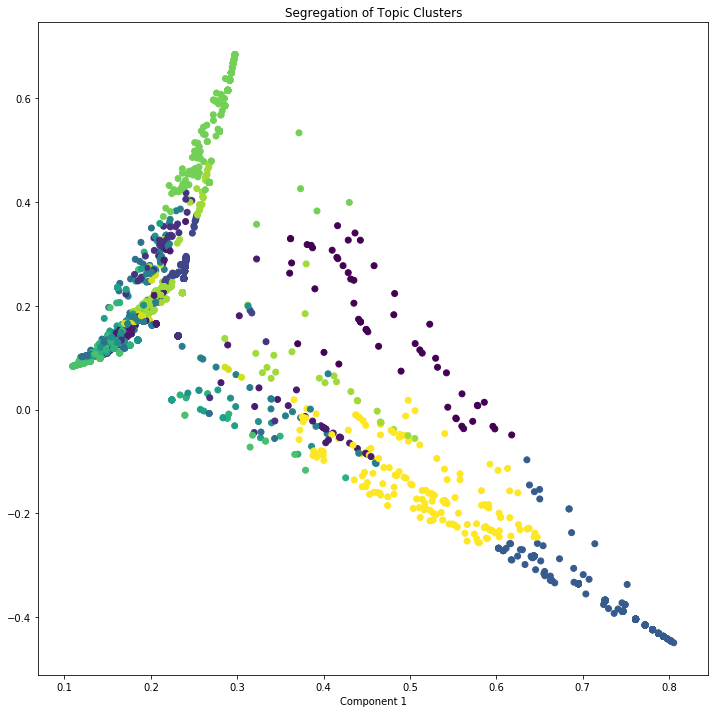

In [65]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )